#Basic Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/raw_house_data - raw_house_data.csv')

# Cleaning Dataset

In [3]:
df = df.dropna()

In [4]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,85739,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",180
4989,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,Ceramic Tile,12
4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2.0,"Carpet, Mexican Tile",6
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,Ceramic Tile,198


In [5]:
df['total_rooms'] = df['bathrooms']+df['bedrooms']

# Handling outliers

In [6]:
#def remove_outliers(df, columns):
#    for col in columns:
#        Q1 = df[col].quantile(0.25)
#        Q3 = df[col].quantile(0.75)
#        IQR = Q3 - Q1
#        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]
#    return df

#df = remove_outliers(df, ['sold_price', 'sqrt_ft', 'lot_acres', 'taxes'])

# Helpful Functions

In [7]:
def MAE(Y, Y_hat):
  return np.sum(np.abs((Y-Y_hat)/Y))

def R2(Y,Y_hat):
  N=len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y,Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

# OLS Multivariate Linear Regression Class

In [8]:
class MVLinearRegression():

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    Y=y

    #Begin SGD optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y,Y_hat,N)
      # Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

In [9]:
features = ['sold_price','sqrt_ft', 'lot_acres', 'year_built', 'taxes']

In [10]:
new_df = df[features]

In [11]:
new_df

,sold_price,sqrt_ft,lot_acres,year_built,taxes
162,1210520.0,3334.0,0.33,0,1412.75
240,1200000.0,4426.0,1.21,2002,10610.26
309,1175000.0,3388.0,0.33,2008,11407.46
323,1212500.0,4600.0,1.29,2010,8282.00
355,1189550.0,2990.0,0.29,2010,845.18
...,...,...,...,...,...
4988,534000.0,2681.0,0.29,2006,4184.40
4989,545000.0,3720.0,1.19,2007,6326.96
4993,565000.0,2813.0,0.83,1986,4568.71
4994,535000.0,2106.0,0.18,2002,4414.00


In [12]:
new_df.columns

Index(['sold_price', 'sqrt_ft', 'lot_acres', 'year_built', 'taxes'], dtype='object')

In [13]:
ninety_pct = 0.9*new_df.shape[0]

X_train = new_df.loc[:ninety_pct-1, :]
X_test = new_df.loc[ninety_pct:, :]

X_train.shape, X_test.shape

((1614, 5), (1576, 5))

In [14]:
y_train = X_train['sold_price']
y_test = X_test['sold_price']

In [15]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

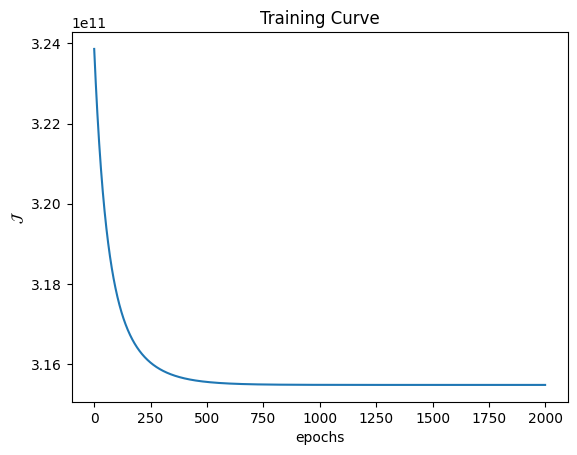

In [22]:
my_reg = MVLinearRegression()
my_reg.fit(X_train, y_train, eta=6e-3, epochs=2e3, show_curve=True)

In [23]:
X_train

,sold_price,sqrt_ft,lot_acres,year_built,taxes
162,3.215918,-0.562258,-1.204203,-22.761897,-2.384519
240,3.134628,1.189151,0.646588,0.118472,1.624141
309,2.941449,-0.475650,-1.204203,0.187045,1.971594
323,3.231218,1.468222,0.814842,0.209902,0.609388
355,3.053879,-1.113984,-1.288329,0.209902,-2.631890
...,...,...,...,...,...
2865,-1.347119,1.917301,1.151350,-0.178675,0.429333
2866,-1.057351,-1.792415,-0.594283,0.164187,0.127478
2868,-0.922126,-1.118796,-0.173648,0.141330,-0.030990
2869,-0.925989,0.185138,0.793810,0.027042,-0.605120


In [24]:
y_hat = my_reg.predict(X_train)

In [25]:
y_hat

,0
162,416150.456674
240,405574.741194
309,380516.234237
323,418088.751901
355,395056.969622
...,...
2865,-174194.846998
2866,-136878.045457
2868,-119352.865966
2869,-119792.725909


In [26]:
y_train

,sold_price
162,1210520.0
240,1200000.0
309,1175000.0
323,1212500.0
355,1189550.0
...,...
2865,620000.0
2866,657500.0
2868,675000.0
2869,674500.0


In [27]:
MAE(y_train, y_hat)

1652.649953787146

In [28]:
R2(y_train, y_hat)

0.025846823888668213

In [29]:
OLS(y_train,y_hat, N=X_train.shape[0])

315484680552.86145